# GRF - examples 2D

Generate gaussian random fields (GRF) using fast Fourier transform (FFT).

## Import what is required

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# import from package 'geone'
from geone import grf
import geone.covModel as gcm
import geone.customcolors as ccol

## Define a covariance model

A covariance model is defined by its elementary contributions given as a list of 2-tuples, 
whose the first component is the type given by a string (`nugget`, `spherical`, `exponential`, `gaussian`, ...) and the second component is a dictionary used to pass the required parameters (the weight (`w`), the range (`r`), ...).  
An azimuth angle (`alpha`) can be specified in degrees: the coordinates system Ox'y' supporting the axes of the model (ranges) is obtained from the original coordinates system Oxy by applying a rotation of the given angle (clockwise for positive angle).

In [24]:
cov_model = gcm.CovModel2D(elem=[
    ('spherical', {'w':5., 'r':[150, 40]}), # elementary contribution
    ('nugget', {'w':.5})                    # elementary contribution
    ], alpha=-30, name='model-2D example')

## Functions of the covariance model and the variogram model
Get the functions.

In [25]:
cov_fun = cov_model.func()
vario_fun = cov_model.vario_func()

Get the sill and the range along each axis in the coordinates system supporting the axes of the model.

In [26]:
w = cov_model.sill() # scalar
r = cov_model.r12()  # vector (1d-array) of length 2

Plot the functions.

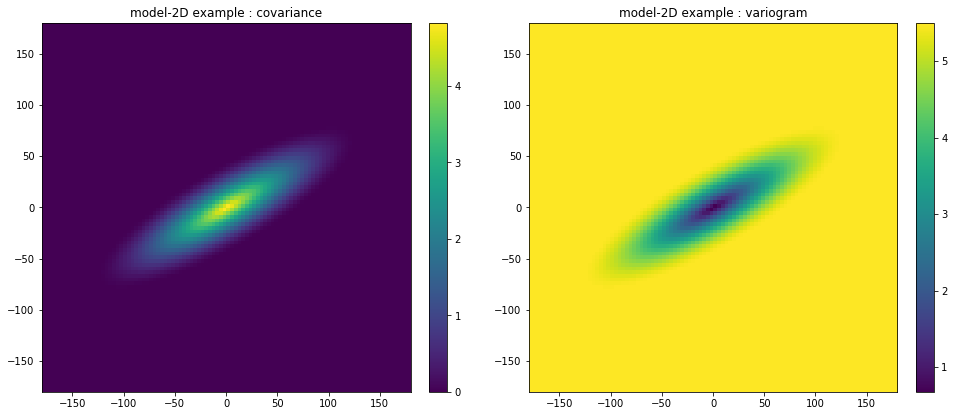

In [27]:
rmax = max(r)
hx = np.linspace(-1.2*rmax, 1.2*rmax, 100)
hy = np.linspace(-1.2*rmax, 1.2*rmax, 100)

hhx, hhy = np.meshgrid(hx, hy)

hh = np.hstack((hhx.reshape(-1,1), hhy.reshape(-1,1))) # 2D-lags: (n,2)-array
ch = cov_fun(hh).reshape(len(hy), len(hx))
vh = vario_fun(hh).reshape(len(hy), len(hx))

xmin, xmax = min(hx), max(hx)
ymin, ymax = min(hy), max(hy)

plt.subplots(1,2,figsize=(16,8)) # plot with 2 sub-plots

# first sub-plot: covariance model
plt.subplot(1,2,1)
im_plot = plt.imshow(ch, cmap='viridis', origin='lower', 
                     extent=[xmin,xmax,ymin,ymax],
                     interpolation='none')
plt.title('{} : covariance'.format(cov_model.name))
ccol.add_colorbar(im_plot)

# first sub-plot: variogram model
plt.subplot(1,2,2)
im_plot = plt.imshow(vh, cmap='viridis', origin='lower', 
                     extent=[xmin,xmax,ymin,ymax],
                     interpolation='none')
plt.title('{} : variogram'.format(cov_model.name))
ccol.add_colorbar(im_plot)

## Simulation of GRF's - 2D
Define the simulation grid.

In [28]:
nx, ny = 220, 230  # number of cells
dx, dy = 1.0, 1.0  # cell unit
ox, oy = 0.0, 0.0  # origin

dimension = [nx, ny]
spacing = [dx, dy]
origin = [ox, oy]

As the generation of GRF's is based on FFT, periodic fields are generated. Hence, an extended simulation grid is used and then cropped after the simulation. The extension should be large enough in order to avoid wrong correlations, i.e. correlations across opposite borders of the grid, or correlations between two nodes regarding both distances between them (with respect to the periodic grid). This extension can be computed with the function `grf.extension_min`.

In [29]:
extensionMin = [grf.extension_min(r, n, s) for r, n, s in zip(cov_model.rxy(), dimension, spacing)]

### Unconditional simulations
Set the number of realizations, the seed and launch the (unconditional) simulations.

In [30]:
nreal = 500
np.random.seed(123)
sim2Da = grf.grf2D(cov_fun, dimension, spacing, origin, 
                   extensionMin=extensionMin, nreal=nreal)

GRF2D: Preliminary computation...
GRF2D: Computing circulant embedding...
GRF2D: Embedding dimension: 512 x 512
GRF2D: Computing FFT of circulant matrix...
GRF2D: Unconditional simulation    1-   2 of  500...
GRF2D: Unconditional simulation    3-   4 of  500...
GRF2D: Unconditional simulation    5-   6 of  500...
GRF2D: Unconditional simulation    7-   8 of  500...
GRF2D: Unconditional simulation    9-  10 of  500...
GRF2D: Unconditional simulation   11-  12 of  500...
GRF2D: Unconditional simulation   13-  14 of  500...
GRF2D: Unconditional simulation   15-  16 of  500...
GRF2D: Unconditional simulation   17-  18 of  500...
GRF2D: Unconditional simulation   19-  20 of  500...
GRF2D: Unconditional simulation   21-  22 of  500...
GRF2D: Unconditional simulation   23-  24 of  500...
GRF2D: Unconditional simulation   25-  26 of  500...
GRF2D: Unconditional simulation   27-  28 of  500...
GRF2D: Unconditional simulation   29-  30 of  500...
GRF2D: Unconditional simulation   31-  32 of  500

GRF2D: Unconditional simulation  309- 310 of  500...
GRF2D: Unconditional simulation  311- 312 of  500...
GRF2D: Unconditional simulation  313- 314 of  500...
GRF2D: Unconditional simulation  315- 316 of  500...
GRF2D: Unconditional simulation  317- 318 of  500...
GRF2D: Unconditional simulation  319- 320 of  500...
GRF2D: Unconditional simulation  321- 322 of  500...
GRF2D: Unconditional simulation  323- 324 of  500...
GRF2D: Unconditional simulation  325- 326 of  500...
GRF2D: Unconditional simulation  327- 328 of  500...
GRF2D: Unconditional simulation  329- 330 of  500...
GRF2D: Unconditional simulation  331- 332 of  500...
GRF2D: Unconditional simulation  333- 334 of  500...
GRF2D: Unconditional simulation  335- 336 of  500...
GRF2D: Unconditional simulation  337- 338 of  500...
GRF2D: Unconditional simulation  339- 340 of  500...
GRF2D: Unconditional simulation  341- 342 of  500...
GRF2D: Unconditional simulation  343- 344 of  500...
GRF2D: Unconditional simulation  345- 346 of  

The result is a 3d array of size `nreal` by `ny` by `nx`:

In [31]:
sim2Da.shape

(500, 230, 220)

Get the mean and the standard deviation.

In [32]:
sim2Da_mean = np.mean(sim2Da.reshape(nreal, -1), axis=0).reshape(ny, nx)
sim2Da_std = np.std(sim2Da.reshape(nreal, -1), axis=0).reshape(ny, nx)

Plot the first realizations, the mean, and the mean +/- standard deviation.

Text(0.5,1,'standard deviation over 500 real')

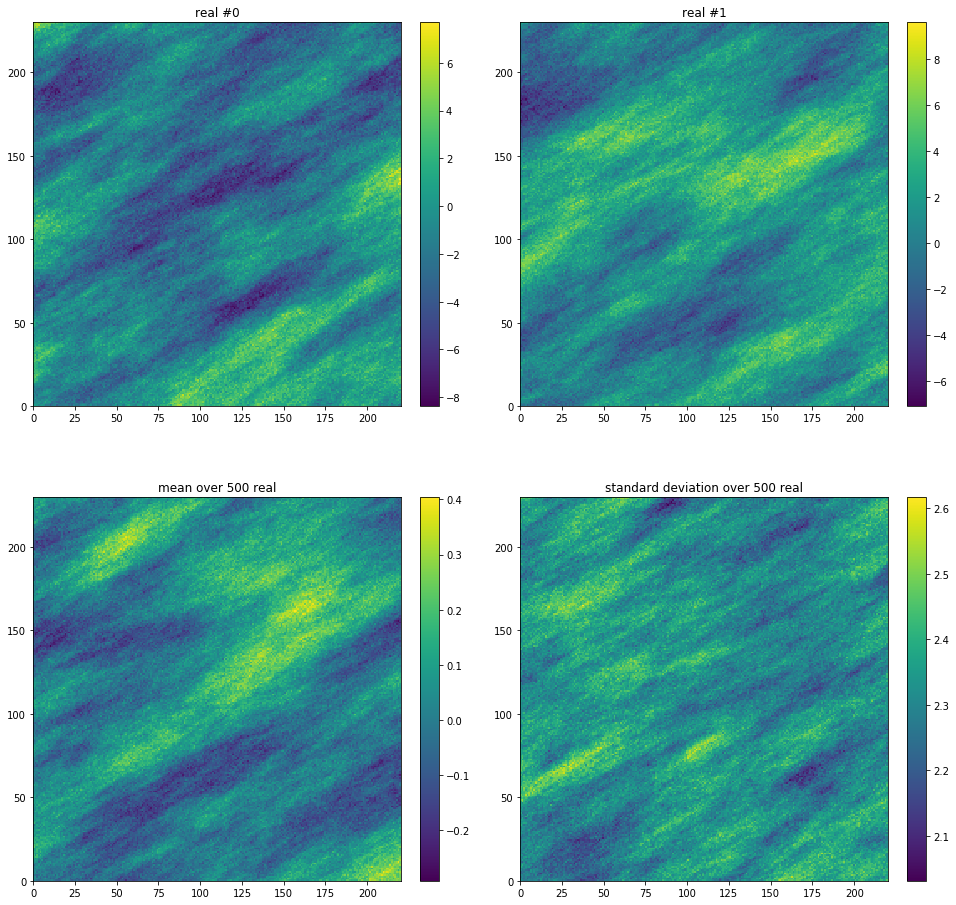

In [33]:
# xg, yg: coordinates of the centers of grid cells
xg = ox + 0.5*dx + dx*np.arange(nx)
yg = oy + 0.5*dy + dy*np.arange(ny)
xmin, xmax = ox, ox + nx * dx
ymin, ymax = oy, oy + ny * dy

plt.subplots(2, 2,figsize=(16,16)) # plot with 4 sub-plots

# 2 first sub-plots: 2 first realizations
for i in (0, 1):
    plt.subplot(2,2,i+1)
    im_plot = plt.imshow(sim2Da[i], origin='lower', 
                         extent=[xmin,xmax,ymin,ymax],
                         interpolation='none')
    ccol.add_colorbar(im_plot)
    plt.title('real #{}'.format(i))

# 3rd sub-plot: mean
plt.subplot(2,2,3)
im_plot = plt.imshow(sim2Da_mean, origin='lower', 
                     extent=[xmin,xmax,ymin,ymax],
                     interpolation='none')
ccol.add_colorbar(im_plot)
plt.title('mean over {} real'.format(nreal))

# 4th sub-plot: standard deviation
plt.subplot(2,2,4)
im_plot = plt.imshow(sim2Da_std, origin='lower', 
                     extent=[xmin,xmax,ymin,ymax],
                     interpolation='none')
ccol.add_colorbar(im_plot)
plt.title('standard deviation over {} real'.format(nreal))

### Conditional simulations
Define hard data. Note that the conditioning values will be attached to the grid cells containing the corresponding conditioning locations.

In [34]:
x = np.array([[ 10.,  20.], # 1st point
              [ 50.,  40.], # 2nd point
              [ 20., 150.], # 3rd point
              [200., 210.]]) # 4th point
v = [ -3.,  2.,   5.,  -1.] # values

Launch the simulations and plot.

In [35]:
np.random.seed(123)
sim2Db = grf.grf2D(cov_fun, dimension, spacing, origin, x=x, v=v, 
                   extensionMin=extensionMin, nreal=nreal)
sim2Db_mean = np.mean(sim2Db.reshape(nreal, -1), axis=0).reshape(ny, nx)
sim2Db_std = np.std(sim2Db.reshape(nreal, -1), axis=0).reshape(ny, nx)

GRF2D: Preliminary computation...
GRF2D: Computing circulant embedding...
GRF2D: Embedding dimension: 512 x 512
GRF2D: Computing FFT of circulant matrix...
GRF2D: Treatment of conditioning data...
GRF2D: Computing covariance matrix (rAA) for conditioning locations...
GRF2D: Computing index in the embedding grid for non-conditioning / conditioning locations...
GRF2D: Unconditional simulation    1-   2 of  500...
GRF2D: Unconditional simulation    3-   4 of  500...
GRF2D: Unconditional simulation    5-   6 of  500...
GRF2D: Unconditional simulation    7-   8 of  500...
GRF2D: Unconditional simulation    9-  10 of  500...
GRF2D: Unconditional simulation   11-  12 of  500...
GRF2D: Unconditional simulation   13-  14 of  500...
GRF2D: Unconditional simulation   15-  16 of  500...
GRF2D: Unconditional simulation   17-  18 of  500...
GRF2D: Unconditional simulation   19-  20 of  500...
GRF2D: Unconditional simulation   21-  22 of  500...
GRF2D: Unconditional simulation   23-  24 of  500...
GR

GRF2D: Unconditional simulation  299- 300 of  500...
GRF2D: Unconditional simulation  301- 302 of  500...
GRF2D: Unconditional simulation  303- 304 of  500...
GRF2D: Unconditional simulation  305- 306 of  500...
GRF2D: Unconditional simulation  307- 308 of  500...
GRF2D: Unconditional simulation  309- 310 of  500...
GRF2D: Unconditional simulation  311- 312 of  500...
GRF2D: Unconditional simulation  313- 314 of  500...
GRF2D: Unconditional simulation  315- 316 of  500...
GRF2D: Unconditional simulation  317- 318 of  500...
GRF2D: Unconditional simulation  319- 320 of  500...
GRF2D: Unconditional simulation  321- 322 of  500...
GRF2D: Unconditional simulation  323- 324 of  500...
GRF2D: Unconditional simulation  325- 326 of  500...
GRF2D: Unconditional simulation  327- 328 of  500...
GRF2D: Unconditional simulation  329- 330 of  500...
GRF2D: Unconditional simulation  331- 332 of  500...
GRF2D: Unconditional simulation  333- 334 of  500...
GRF2D: Unconditional simulation  335- 336 of  

GRF2D: Updating conditional simulation   56 of  500...
GRF2D: Updating conditional simulation   57 of  500...
GRF2D: Updating conditional simulation   58 of  500...
GRF2D: Updating conditional simulation   59 of  500...
GRF2D: Updating conditional simulation   60 of  500...
GRF2D: Updating conditional simulation   61 of  500...
GRF2D: Updating conditional simulation   62 of  500...
GRF2D: Updating conditional simulation   63 of  500...
GRF2D: Updating conditional simulation   64 of  500...
GRF2D: Updating conditional simulation   65 of  500...
GRF2D: Updating conditional simulation   66 of  500...
GRF2D: Updating conditional simulation   67 of  500...
GRF2D: Updating conditional simulation   68 of  500...
GRF2D: Updating conditional simulation   69 of  500...
GRF2D: Updating conditional simulation   70 of  500...
GRF2D: Updating conditional simulation   71 of  500...
GRF2D: Updating conditional simulation   72 of  500...
GRF2D: Updating conditional simulation   73 of  500...
GRF2D: Upd

GRF2D: Updating conditional simulation  205 of  500...
GRF2D: Updating conditional simulation  206 of  500...
GRF2D: Updating conditional simulation  207 of  500...
GRF2D: Updating conditional simulation  208 of  500...
GRF2D: Updating conditional simulation  209 of  500...
GRF2D: Updating conditional simulation  210 of  500...
GRF2D: Updating conditional simulation  211 of  500...
GRF2D: Updating conditional simulation  212 of  500...
GRF2D: Updating conditional simulation  213 of  500...
GRF2D: Updating conditional simulation  214 of  500...
GRF2D: Updating conditional simulation  215 of  500...
GRF2D: Updating conditional simulation  216 of  500...
GRF2D: Updating conditional simulation  217 of  500...
GRF2D: Updating conditional simulation  218 of  500...
GRF2D: Updating conditional simulation  219 of  500...
GRF2D: Updating conditional simulation  220 of  500...
GRF2D: Updating conditional simulation  221 of  500...
GRF2D: Updating conditional simulation  222 of  500...
GRF2D: Upd

GRF2D: Updating conditional simulation  357 of  500...
GRF2D: Updating conditional simulation  358 of  500...
GRF2D: Updating conditional simulation  359 of  500...
GRF2D: Updating conditional simulation  360 of  500...
GRF2D: Updating conditional simulation  361 of  500...
GRF2D: Updating conditional simulation  362 of  500...
GRF2D: Updating conditional simulation  363 of  500...
GRF2D: Updating conditional simulation  364 of  500...
GRF2D: Updating conditional simulation  365 of  500...
GRF2D: Updating conditional simulation  366 of  500...
GRF2D: Updating conditional simulation  367 of  500...
GRF2D: Updating conditional simulation  368 of  500...
GRF2D: Updating conditional simulation  369 of  500...
GRF2D: Updating conditional simulation  370 of  500...
GRF2D: Updating conditional simulation  371 of  500...
GRF2D: Updating conditional simulation  372 of  500...
GRF2D: Updating conditional simulation  373 of  500...
GRF2D: Updating conditional simulation  374 of  500...
GRF2D: Upd

Text(0.5,1,'standard deviation over 500 real')

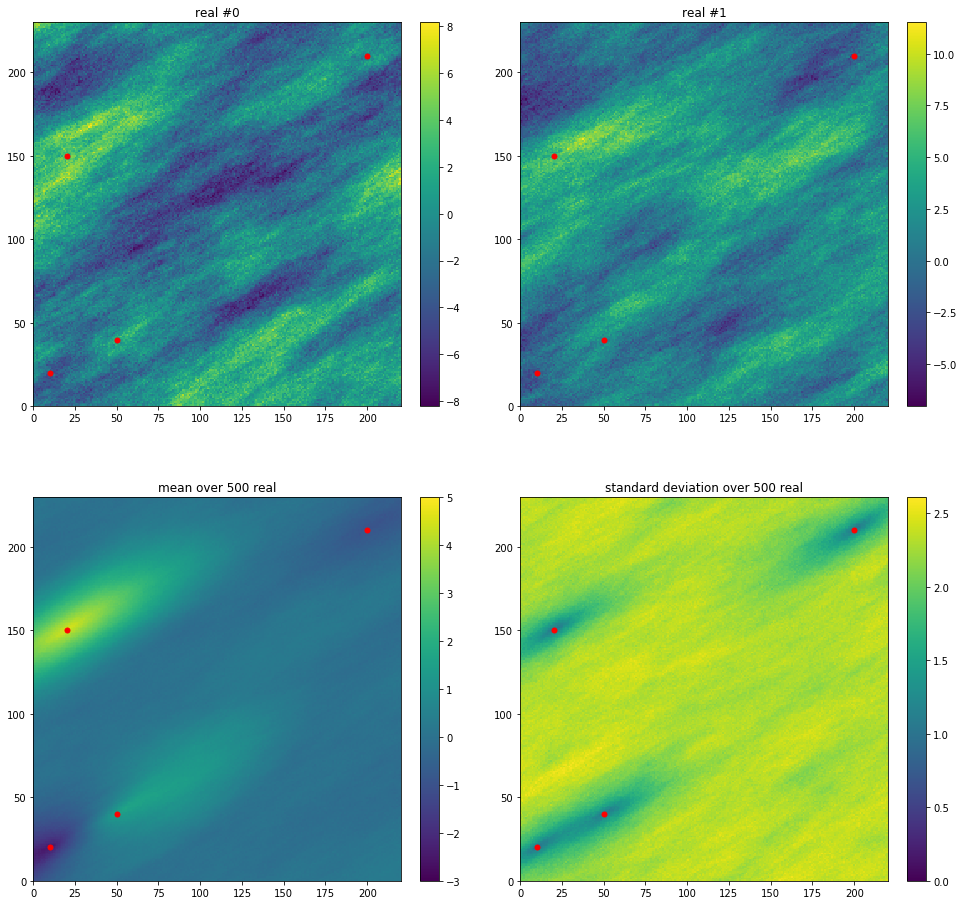

In [36]:
plt.subplots(2, 2,figsize=(16,16)) # plot with 4 sub-plots

# 2 first sub-plots: 2 first realizations
for i in (0, 1):
    plt.subplot(2,2,i+1)
    im_plot = plt.imshow(sim2Db[i], origin='lower', 
                         extent=[xmin,xmax,ymin,ymax],
                         interpolation='none')
    ccol.add_colorbar(im_plot)
    plt.plot(x[:,0],x[:,1], 'o', c='red', markersize=5) # add conditioning points
    plt.title('real #{}'.format(i))

# 3rd sub-plot: mean
plt.subplot(2,2,3)
im_plot = plt.imshow(sim2Db_mean, origin='lower', 
                     extent=[xmin,xmax,ymin,ymax],
                     interpolation='none')
ccol.add_colorbar(im_plot)
plt.plot(x[:,0],x[:,1], 'o', c='red', markersize=5) # add conditioning points
plt.title('mean over {} real'.format(nreal))

# 4th sub-plot: standard deviation
plt.subplot(2,2,4)
im_plot = plt.imshow(sim2Db_std, origin='lower', 
                     extent=[xmin,xmax,ymin,ymax],
                     interpolation='none')
ccol.add_colorbar(im_plot)
plt.plot(x[:,0],x[:,1], 'o', c='red', markersize=5) # add conditioning points
plt.title('standard deviation over {} real'.format(nreal))

### Kriging
Compute (simple) kriging estimates and standard deviation.

In [37]:
krig2Db, krig2Db_std = grf.krige2D(x, v, cov_fun, dimension, spacing, origin, 
                                   extensionMin=extensionMin)

KRIGE2D: Computing circulant embedding...
KRIGE2D: Embedding dimension: 512 x 512
KRIGE2D: Computing FFT of circulant matrix...
KRIGE2D: Computing covariance matrix (rAA) for conditioning locations...
KRIGE2D: Computing index in the embedding grid for non-conditioning / conditioning locations...
KRIGE2D: computing kriging estimates...
KRIGE2D: computing kriging standard deviation ...


Plot the kriging estimates and standard deviation.

Text(0.5,1,'kriging standard deviation')

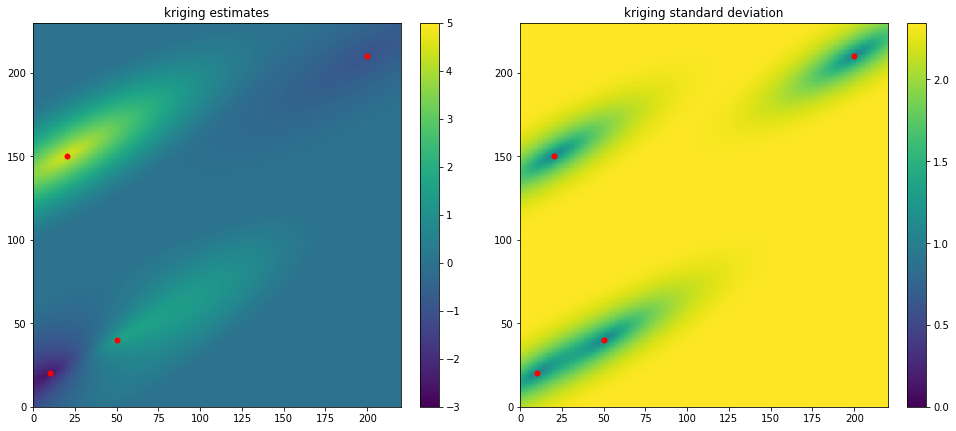

In [38]:
plt.subplots(1, 2,figsize=(16,16)) # plot with 2 sub-plots

# 1st sub-plot: kriging estimates
plt.subplot(1,2,1)
im_plot = plt.imshow(krig2Db, origin='lower', 
                     extent=[xmin,xmax,ymin,ymax],
                     interpolation='none')
ccol.add_colorbar(im_plot)
plt.plot(x[:,0],x[:,1], 'o', c='red', markersize=5) # add conditioning points
plt.title('kriging estimates')

# 2nd sub-plot: kriging standard deviation
plt.subplot(1,2,2)
im_plot = plt.imshow(krig2Db_std, origin='lower', 
                     extent=[xmin,xmax,ymin,ymax],
                     interpolation='none')
ccol.add_colorbar(im_plot)
plt.plot(x[:,0],x[:,1], 'o', c='red', markersize=5) # add conditioning points
plt.title('kriging standard deviation')

## Simulations with imposed mean and/or variance
Mean and variance in the simulation grid can be specified, they can be stationary (constant) or non-stationary. 
By default, the mean is zero (constant) and the variance is given by the sill of the variogram model (constant).

### Simulations with constant mean and variance

In [39]:
np.random.seed(123)
sim2Dc = grf.grf2D(cov_fun, dimension, spacing, origin, x=x, v=v, 
                   mean=3., var=2*w, 
                   extensionMin=extensionMin, nreal=nreal)
sim2Dc_mean = np.mean(sim2Dc.reshape(nreal, -1), axis=0).reshape(ny, nx)
sim2Dc_std = np.std(sim2Dc.reshape(nreal, -1), axis=0).reshape(ny, nx)

GRF2D: Preliminary computation...
GRF2D: Computing circulant embedding...
GRF2D: Embedding dimension: 512 x 512
GRF2D: Computing FFT of circulant matrix...
GRF2D: Treatment of conditioning data...
GRF2D: Computing covariance matrix (rAA) for conditioning locations...
GRF2D: Computing index in the embedding grid for non-conditioning / conditioning locations...
GRF2D: Unconditional simulation    1-   2 of  500...
GRF2D: Unconditional simulation    3-   4 of  500...
GRF2D: Unconditional simulation    5-   6 of  500...
GRF2D: Unconditional simulation    7-   8 of  500...
GRF2D: Unconditional simulation    9-  10 of  500...
GRF2D: Unconditional simulation   11-  12 of  500...
GRF2D: Unconditional simulation   13-  14 of  500...
GRF2D: Unconditional simulation   15-  16 of  500...
GRF2D: Unconditional simulation   17-  18 of  500...
GRF2D: Unconditional simulation   19-  20 of  500...
GRF2D: Unconditional simulation   21-  22 of  500...
GRF2D: Unconditional simulation   23-  24 of  500...
GR

GRF2D: Unconditional simulation  297- 298 of  500...
GRF2D: Unconditional simulation  299- 300 of  500...
GRF2D: Unconditional simulation  301- 302 of  500...
GRF2D: Unconditional simulation  303- 304 of  500...
GRF2D: Unconditional simulation  305- 306 of  500...
GRF2D: Unconditional simulation  307- 308 of  500...
GRF2D: Unconditional simulation  309- 310 of  500...
GRF2D: Unconditional simulation  311- 312 of  500...
GRF2D: Unconditional simulation  313- 314 of  500...
GRF2D: Unconditional simulation  315- 316 of  500...
GRF2D: Unconditional simulation  317- 318 of  500...
GRF2D: Unconditional simulation  319- 320 of  500...
GRF2D: Unconditional simulation  321- 322 of  500...
GRF2D: Unconditional simulation  323- 324 of  500...
GRF2D: Unconditional simulation  325- 326 of  500...
GRF2D: Unconditional simulation  327- 328 of  500...
GRF2D: Unconditional simulation  329- 330 of  500...
GRF2D: Unconditional simulation  331- 332 of  500...
GRF2D: Unconditional simulation  333- 334 of  

GRF2D: Updating conditional simulation   57 of  500...
GRF2D: Updating conditional simulation   58 of  500...
GRF2D: Updating conditional simulation   59 of  500...
GRF2D: Updating conditional simulation   60 of  500...
GRF2D: Updating conditional simulation   61 of  500...
GRF2D: Updating conditional simulation   62 of  500...
GRF2D: Updating conditional simulation   63 of  500...
GRF2D: Updating conditional simulation   64 of  500...
GRF2D: Updating conditional simulation   65 of  500...
GRF2D: Updating conditional simulation   66 of  500...
GRF2D: Updating conditional simulation   67 of  500...
GRF2D: Updating conditional simulation   68 of  500...
GRF2D: Updating conditional simulation   69 of  500...
GRF2D: Updating conditional simulation   70 of  500...
GRF2D: Updating conditional simulation   71 of  500...
GRF2D: Updating conditional simulation   72 of  500...
GRF2D: Updating conditional simulation   73 of  500...
GRF2D: Updating conditional simulation   74 of  500...
GRF2D: Upd

GRF2D: Updating conditional simulation  208 of  500...
GRF2D: Updating conditional simulation  209 of  500...
GRF2D: Updating conditional simulation  210 of  500...
GRF2D: Updating conditional simulation  211 of  500...
GRF2D: Updating conditional simulation  212 of  500...
GRF2D: Updating conditional simulation  213 of  500...
GRF2D: Updating conditional simulation  214 of  500...
GRF2D: Updating conditional simulation  215 of  500...
GRF2D: Updating conditional simulation  216 of  500...
GRF2D: Updating conditional simulation  217 of  500...
GRF2D: Updating conditional simulation  218 of  500...
GRF2D: Updating conditional simulation  219 of  500...
GRF2D: Updating conditional simulation  220 of  500...
GRF2D: Updating conditional simulation  221 of  500...
GRF2D: Updating conditional simulation  222 of  500...
GRF2D: Updating conditional simulation  223 of  500...
GRF2D: Updating conditional simulation  224 of  500...
GRF2D: Updating conditional simulation  225 of  500...
GRF2D: Upd

GRF2D: Updating conditional simulation  360 of  500...
GRF2D: Updating conditional simulation  361 of  500...
GRF2D: Updating conditional simulation  362 of  500...
GRF2D: Updating conditional simulation  363 of  500...
GRF2D: Updating conditional simulation  364 of  500...
GRF2D: Updating conditional simulation  365 of  500...
GRF2D: Updating conditional simulation  366 of  500...
GRF2D: Updating conditional simulation  367 of  500...
GRF2D: Updating conditional simulation  368 of  500...
GRF2D: Updating conditional simulation  369 of  500...
GRF2D: Updating conditional simulation  370 of  500...
GRF2D: Updating conditional simulation  371 of  500...
GRF2D: Updating conditional simulation  372 of  500...
GRF2D: Updating conditional simulation  373 of  500...
GRF2D: Updating conditional simulation  374 of  500...
GRF2D: Updating conditional simulation  375 of  500...
GRF2D: Updating conditional simulation  376 of  500...
GRF2D: Updating conditional simulation  377 of  500...
GRF2D: Upd

Text(0.5,1,'standard deviation over 500 real')

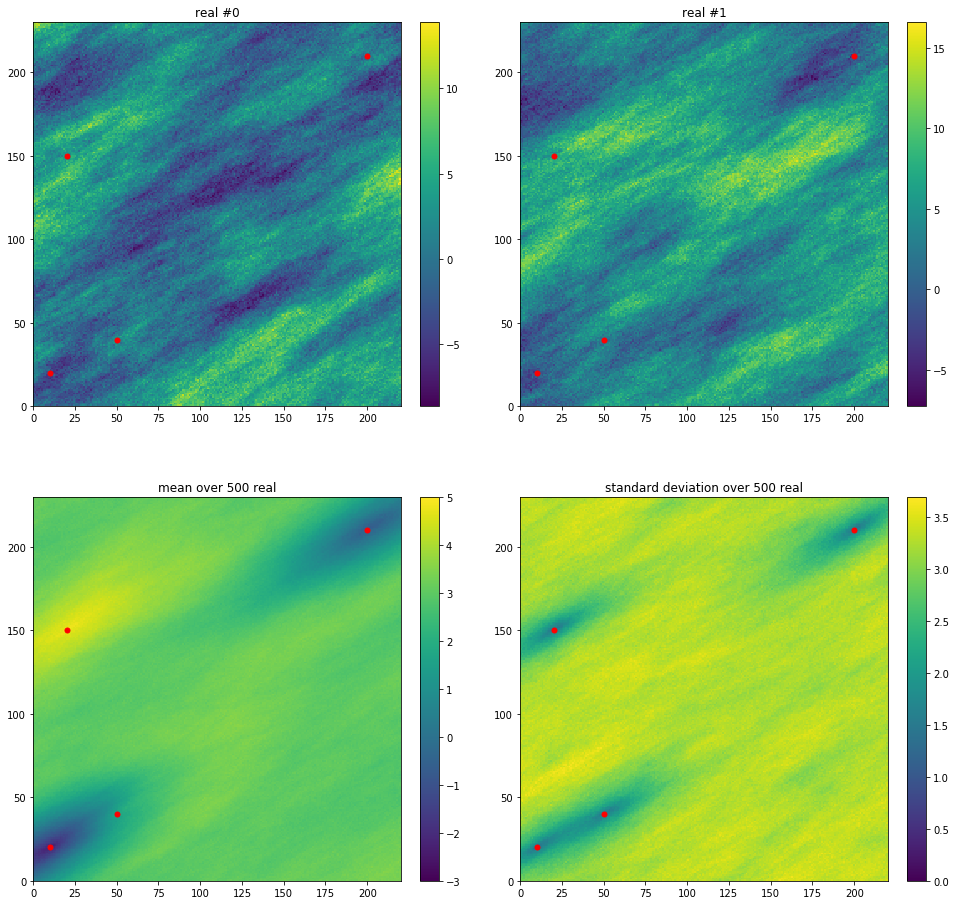

In [40]:
plt.subplots(2, 2,figsize=(16,16)) # plot with 4 sub-plots

# 2 first sub-plots: 2 first realizations
for i in (0, 1):
    plt.subplot(2,2,i+1)
    im_plot = plt.imshow(sim2Dc[i], origin='lower', 
                         extent=[xmin,xmax,ymin,ymax],
                         interpolation='none')
    ccol.add_colorbar(im_plot)
    plt.plot(x[:,0],x[:,1], 'o', c='red', markersize=5) # add conditioning points
    plt.title('real #{}'.format(i))

# 3rd sub-plot: mean
plt.subplot(2,2,3)
im_plot = plt.imshow(sim2Dc_mean, origin='lower', 
                     extent=[xmin,xmax,ymin,ymax],
                     interpolation='none')
ccol.add_colorbar(im_plot)
plt.plot(x[:,0],x[:,1], 'o', c='red', markersize=5) # add conditioning points
plt.title('mean over {} real'.format(nreal))

# 4th sub-plot: standard deviation
plt.subplot(2,2,4)
im_plot = plt.imshow(sim2Dc_std, origin='lower', 
                     extent=[xmin,xmax,ymin,ymax],
                     interpolation='none')
ccol.add_colorbar(im_plot)
plt.plot(x[:,0],x[:,1], 'o', c='red', markersize=5) # add conditioning points
plt.title('standard deviation over {} real'.format(nreal))

In [41]:
krig2Dc, krig2Dc_std = grf.krige2D(x, v, cov_fun, dimension, spacing, origin, 
                                   mean=3., var=2*w, 
                                   extensionMin=extensionMin)

KRIGE2D: Computing circulant embedding...
KRIGE2D: Embedding dimension: 512 x 512
KRIGE2D: Computing FFT of circulant matrix...
KRIGE2D: Computing covariance matrix (rAA) for conditioning locations...
KRIGE2D: Computing index in the embedding grid for non-conditioning / conditioning locations...
KRIGE2D: computing kriging estimates...
KRIGE2D: computing kriging standard deviation ...


Text(0.5,1,'kriging standard deviation')

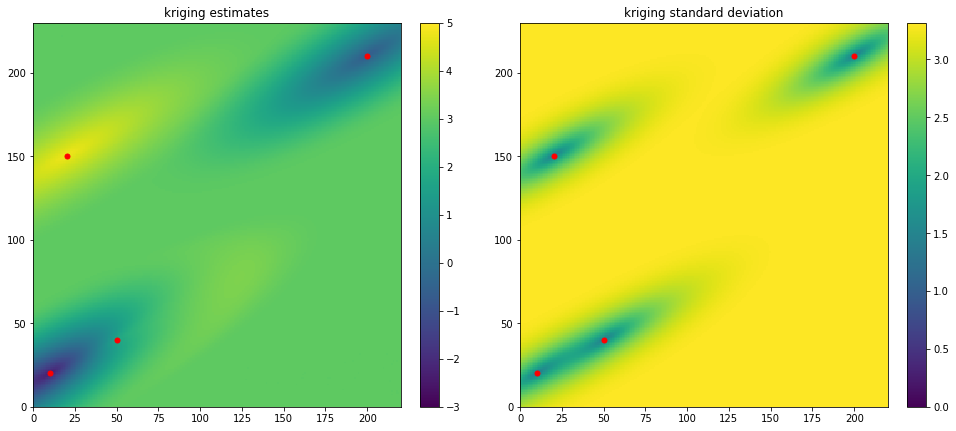

In [42]:
plt.subplots(1, 2,figsize=(16,16)) # plot with 2 sub-plots

# 1st sub-plot: kriging estimates
plt.subplot(1,2,1)
im_plot = plt.imshow(krig2Dc, origin='lower', 
                     extent=[xmin,xmax,ymin,ymax],
                     interpolation='none')
ccol.add_colorbar(im_plot)
plt.plot(x[:,0],x[:,1], 'o', c='red', markersize=5) # add conditioning points
plt.title('kriging estimates')

# 2nd sub-plot: kriging standard deviation
plt.subplot(1,2,2)
im_plot = plt.imshow(krig2Dc_std, origin='lower', 
                     extent=[xmin,xmax,ymin,ymax],
                     interpolation='none')
ccol.add_colorbar(im_plot)
plt.plot(x[:,0],x[:,1], 'o', c='red', markersize=5) # add conditioning points
plt.title('kriging standard deviation')

### Simulations with non-stationary mean and variance

In [43]:
xx, yy = np.meshgrid(xg, yg) # create meshgrid from the center of grid cells
mean = 0.1*(yy - xx)         # define mean on the simulation grid
var = 1 + 0.1*(xx + yy)      # define variance on the simulation grid
np.random.seed(123)
sim2Dd = grf.grf2D(cov_fun, dimension, spacing, origin, x=x, v=v, 
                   mean=mean, var=var,
                   extensionMin=extensionMin, nreal=nreal)
sim2Dd_mean = np.mean(sim2Dd.reshape(nreal, -1), axis=0).reshape(ny, nx)
sim2Dd_std = np.std(sim2Dd.reshape(nreal, -1), axis=0).reshape(ny, nx)

GRF2D: Preliminary computation...
GRF2D: Computing circulant embedding...
GRF2D: Embedding dimension: 512 x 512
GRF2D: Computing FFT of circulant matrix...
GRF2D: Treatment of conditioning data...
GRF2D: Computing covariance matrix (rAA) for conditioning locations...
GRF2D: Computing index in the embedding grid for non-conditioning / conditioning locations...
GRF2D: Unconditional simulation    1-   2 of  500...
GRF2D: Unconditional simulation    3-   4 of  500...
GRF2D: Unconditional simulation    5-   6 of  500...
GRF2D: Unconditional simulation    7-   8 of  500...
GRF2D: Unconditional simulation    9-  10 of  500...
GRF2D: Unconditional simulation   11-  12 of  500...
GRF2D: Unconditional simulation   13-  14 of  500...
GRF2D: Unconditional simulation   15-  16 of  500...
GRF2D: Unconditional simulation   17-  18 of  500...
GRF2D: Unconditional simulation   19-  20 of  500...
GRF2D: Unconditional simulation   21-  22 of  500...
GRF2D: Unconditional simulation   23-  24 of  500...
GR

GRF2D: Unconditional simulation  297- 298 of  500...
GRF2D: Unconditional simulation  299- 300 of  500...
GRF2D: Unconditional simulation  301- 302 of  500...
GRF2D: Unconditional simulation  303- 304 of  500...
GRF2D: Unconditional simulation  305- 306 of  500...
GRF2D: Unconditional simulation  307- 308 of  500...
GRF2D: Unconditional simulation  309- 310 of  500...
GRF2D: Unconditional simulation  311- 312 of  500...
GRF2D: Unconditional simulation  313- 314 of  500...
GRF2D: Unconditional simulation  315- 316 of  500...
GRF2D: Unconditional simulation  317- 318 of  500...
GRF2D: Unconditional simulation  319- 320 of  500...
GRF2D: Unconditional simulation  321- 322 of  500...
GRF2D: Unconditional simulation  323- 324 of  500...
GRF2D: Unconditional simulation  325- 326 of  500...
GRF2D: Unconditional simulation  327- 328 of  500...
GRF2D: Unconditional simulation  329- 330 of  500...
GRF2D: Unconditional simulation  331- 332 of  500...
GRF2D: Unconditional simulation  333- 334 of  

GRF2D: Updating conditional simulation   55 of  500...
GRF2D: Updating conditional simulation   56 of  500...
GRF2D: Updating conditional simulation   57 of  500...
GRF2D: Updating conditional simulation   58 of  500...
GRF2D: Updating conditional simulation   59 of  500...
GRF2D: Updating conditional simulation   60 of  500...
GRF2D: Updating conditional simulation   61 of  500...
GRF2D: Updating conditional simulation   62 of  500...
GRF2D: Updating conditional simulation   63 of  500...
GRF2D: Updating conditional simulation   64 of  500...
GRF2D: Updating conditional simulation   65 of  500...
GRF2D: Updating conditional simulation   66 of  500...
GRF2D: Updating conditional simulation   67 of  500...
GRF2D: Updating conditional simulation   68 of  500...
GRF2D: Updating conditional simulation   69 of  500...
GRF2D: Updating conditional simulation   70 of  500...
GRF2D: Updating conditional simulation   71 of  500...
GRF2D: Updating conditional simulation   72 of  500...
GRF2D: Upd

GRF2D: Updating conditional simulation  207 of  500...
GRF2D: Updating conditional simulation  208 of  500...
GRF2D: Updating conditional simulation  209 of  500...
GRF2D: Updating conditional simulation  210 of  500...
GRF2D: Updating conditional simulation  211 of  500...
GRF2D: Updating conditional simulation  212 of  500...
GRF2D: Updating conditional simulation  213 of  500...
GRF2D: Updating conditional simulation  214 of  500...
GRF2D: Updating conditional simulation  215 of  500...
GRF2D: Updating conditional simulation  216 of  500...
GRF2D: Updating conditional simulation  217 of  500...
GRF2D: Updating conditional simulation  218 of  500...
GRF2D: Updating conditional simulation  219 of  500...
GRF2D: Updating conditional simulation  220 of  500...
GRF2D: Updating conditional simulation  221 of  500...
GRF2D: Updating conditional simulation  222 of  500...
GRF2D: Updating conditional simulation  223 of  500...
GRF2D: Updating conditional simulation  224 of  500...
GRF2D: Upd

GRF2D: Updating conditional simulation  358 of  500...
GRF2D: Updating conditional simulation  359 of  500...
GRF2D: Updating conditional simulation  360 of  500...
GRF2D: Updating conditional simulation  361 of  500...
GRF2D: Updating conditional simulation  362 of  500...
GRF2D: Updating conditional simulation  363 of  500...
GRF2D: Updating conditional simulation  364 of  500...
GRF2D: Updating conditional simulation  365 of  500...
GRF2D: Updating conditional simulation  366 of  500...
GRF2D: Updating conditional simulation  367 of  500...
GRF2D: Updating conditional simulation  368 of  500...
GRF2D: Updating conditional simulation  369 of  500...
GRF2D: Updating conditional simulation  370 of  500...
GRF2D: Updating conditional simulation  371 of  500...
GRF2D: Updating conditional simulation  372 of  500...
GRF2D: Updating conditional simulation  373 of  500...
GRF2D: Updating conditional simulation  374 of  500...
GRF2D: Updating conditional simulation  375 of  500...
GRF2D: Upd

Text(0.5,1,'standard deviation over 500 real')

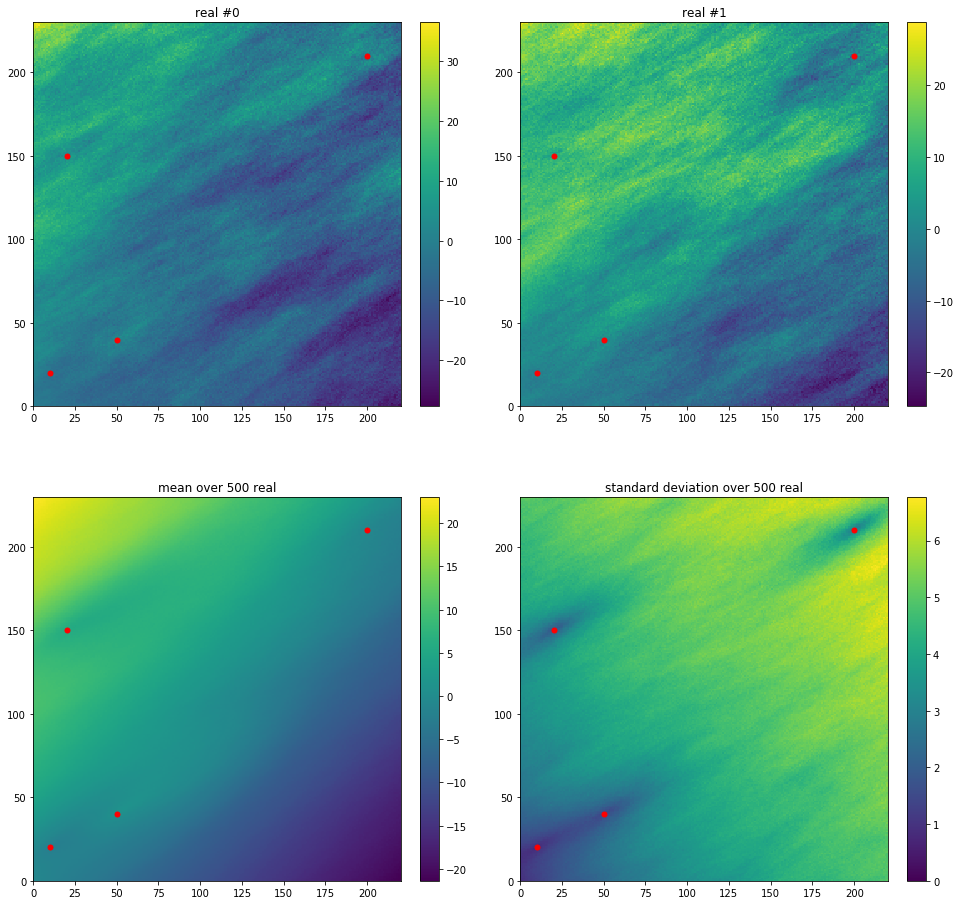

In [44]:
plt.subplots(2, 2,figsize=(16,16)) # plot with 4 sub-plots

# 2 first sub-plots: 2 first realizations
for i in (0, 1):
    plt.subplot(2,2,i+1)
    im_plot = plt.imshow(sim2Dd[i], origin='lower', 
                         extent=[xmin,xmax,ymin,ymax],
                         interpolation='none')
    ccol.add_colorbar(im_plot)
    plt.plot(x[:,0],x[:,1], 'o', c='red', markersize=5) # add conditioning points
    plt.title('real #{}'.format(i))

# 3rd sub-plot: mean
plt.subplot(2,2,3)
im_plot = plt.imshow(sim2Dd_mean, origin='lower', 
                     extent=[xmin,xmax,ymin,ymax],
                     interpolation='none')
ccol.add_colorbar(im_plot)
plt.plot(x[:,0],x[:,1], 'o', c='red', markersize=5) # add conditioning points
plt.title('mean over {} real'.format(nreal))

# 4th sub-plot: standard deviation
plt.subplot(2,2,4)
im_plot = plt.imshow(sim2Dd_std, origin='lower', 
                     extent=[xmin,xmax,ymin,ymax],
                     interpolation='none')
ccol.add_colorbar(im_plot)
plt.plot(x[:,0],x[:,1], 'o', c='red', markersize=5) # add conditioning points
plt.title('standard deviation over {} real'.format(nreal))

In [45]:
krig2Dd, krig2Dd_std = grf.krige2D(x, v, cov_fun, dimension, spacing, origin, 
                                   mean=mean, var=var,
                                   extensionMin=extensionMin)

KRIGE2D: Computing circulant embedding...
KRIGE2D: Embedding dimension: 512 x 512
KRIGE2D: Computing FFT of circulant matrix...
KRIGE2D: Computing covariance matrix (rAA) for conditioning locations...
KRIGE2D: Computing index in the embedding grid for non-conditioning / conditioning locations...
KRIGE2D: computing kriging estimates...
KRIGE2D: computing kriging standard deviation ...


Text(0.5,1,'kriging standard deviation')

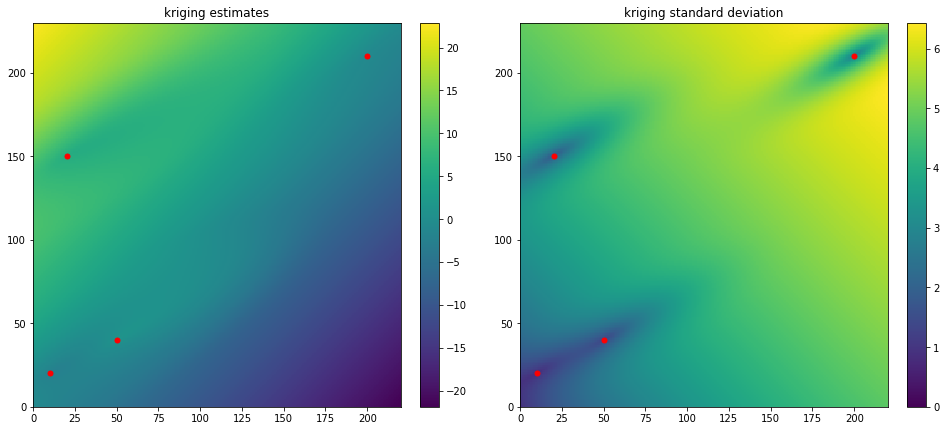

In [46]:
plt.subplots(1, 2,figsize=(16,16)) # plot with 2 sub-plots

# 1st sub-plot: kriging estimates
plt.subplot(1,2,1)
im_plot = plt.imshow(krig2Dd, origin='lower', 
                     extent=[xmin,xmax,ymin,ymax],
                     interpolation='none')
ccol.add_colorbar(im_plot)
plt.plot(x[:,0],x[:,1], 'o', c='red', markersize=5) # add conditioning points
plt.title('kriging estimates')

# 2nd sub-plot: kriging standard deviation
plt.subplot(1,2,2)
im_plot = plt.imshow(krig2Dd_std, origin='lower', 
                     extent=[xmin,xmax,ymin,ymax],
                     interpolation='none')
ccol.add_colorbar(im_plot)
plt.plot(x[:,0],x[:,1], 'o', c='red', markersize=5) # add conditioning points
plt.title('kriging standard deviation')